## Task 1 iscancerous

## Loading the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2

In [2]:
#conda install -c conda-forge opencv

## Reading the data 

In [3]:
import zipfile
with zipfile.ZipFile('./image_classification_data.zip', 'r') as zip_ref:
    zip_ref.extractall('./')
    

In [4]:
maindata = pd.read_csv('./image_classification_data/data_labels_mainData.csv')
extradata = pd.read_csv('./image_classification_data/data_labels_extraData.csv')

In [5]:
image_folder = "image_classification_data/patch_images/"


In [6]:
#Adding image path to the dataframe
maindata['image_path'] = image_folder + maindata['ImageName']
extradata['image_path'] = image_folder + extradata['ImageName']


In [7]:
maindata.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,image_path
0,22405,1,22405.png,fibroblast,0,0,image_classification_data/patch_images/22405.png
1,22406,1,22406.png,fibroblast,0,0,image_classification_data/patch_images/22406.png
2,22407,1,22407.png,fibroblast,0,0,image_classification_data/patch_images/22407.png
3,22408,1,22408.png,fibroblast,0,0,image_classification_data/patch_images/22408.png
4,22409,1,22409.png,fibroblast,0,0,image_classification_data/patch_images/22409.png


In [8]:
extradata.head()

,InstanceID,patientID,ImageName,isCancerous,image_path
0,12681,61,12681.png,0,image_classification_data/patch_images/12681.png
1,12682,61,12682.png,0,image_classification_data/patch_images/12682.png
2,12683,61,12683.png,0,image_classification_data/patch_images/12683.png
3,12684,61,12684.png,0,image_classification_data/patch_images/12684.png
4,12685,61,12685.png,0,image_classification_data/patch_images/12685.png


## Combining the two datasets

In [9]:
data = maindata.append(extradata)

In [10]:
data.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,image_path
0,22405,1,22405.png,fibroblast,0.0,0,image_classification_data/patch_images/22405.png
1,22406,1,22406.png,fibroblast,0.0,0,image_classification_data/patch_images/22406.png
2,22407,1,22407.png,fibroblast,0.0,0,image_classification_data/patch_images/22407.png
3,22408,1,22408.png,fibroblast,0.0,0,image_classification_data/patch_images/22408.png
4,22409,1,22409.png,fibroblast,0.0,0,image_classification_data/patch_images/22409.png


In [11]:
#Storing the image data in a list
def load_image(path):
    with Image.open(path) as img:
        return img

images = [load_image(path) for path in data['image_path']]

In [12]:
images

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.Pn

pip install --upgrade Pillow

## Exploratory Data Analysis

In [13]:
#Checking for missing values in the combined dataset

cellType and cellTypeName have missing values as second dataset did not have these variables

In [14]:
data.isnull().sum()

InstanceID          0
patientID           0
ImageName           0
cellTypeName    10384
cellType        10384
isCancerous         0
image_path          0
dtype: int64

In [15]:
data.cellTypeName.value_counts() #The value of cellTypeName is divided exactly into 4

epithelial      4079
inflammatory    2543
fibroblast      1888
others          1386
Name: cellTypeName, dtype: int64

In [16]:
data.cellType.value_counts() #The value of cellTypeName is divided exactly into 4

2.0    4079
1.0    2543
0.0    1888
3.0    1386
Name: cellType, dtype: int64

In [17]:
data.isCancerous.value_counts() #The value of isCancerous is in to two parts 

0    13211
1     7069
Name: isCancerous, dtype: int64

<AxesSubplot:>

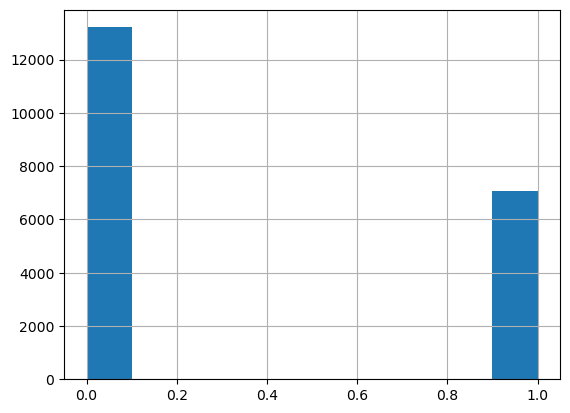

In [18]:
data.isCancerous.hist()

<AxesSubplot:>

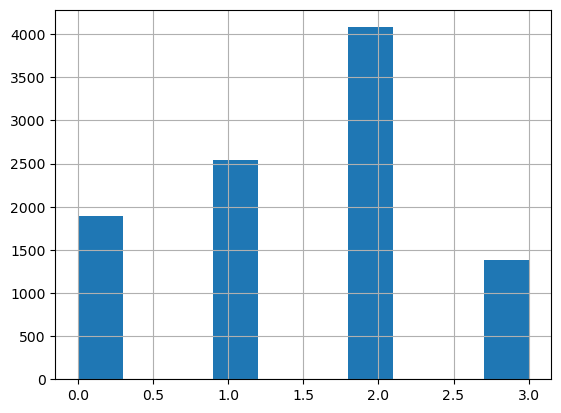

In [19]:
data.cellType.hist()

In [20]:
data.patientID.value_counts().max()

699

In [21]:
data.patientID.value_counts().min()

6

<AxesSubplot:>

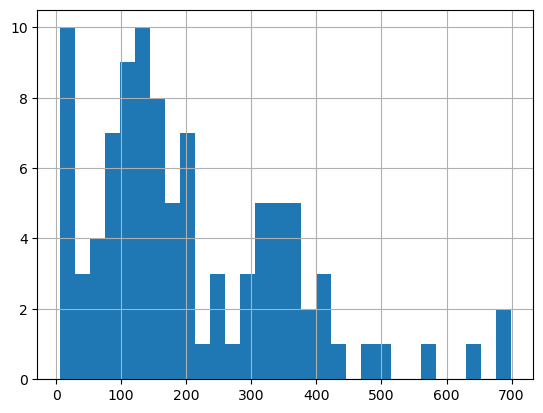

In [22]:
data.patientID.value_counts().hist(bins=30)

One patient in the dataset can have images ranging from 6 to 699

- dropping instance id as it is not relevant to the findings
- dropping cellType and cellTypename as we are currently performing task 1 which is classification based on is cancerous

In [23]:
data = data.drop('InstanceID',axis=1)
data = data.drop('cellType',axis=1)
data = data.drop('cellTypeName',axis=1)

Checking if the image data is has the same height and width 

In [24]:
image_dimensions = []

# Iterate through the images
for image_path in data['image_path']:
    with Image.open(image_path) as img:
        # Get the height and width of the image
        width, height = img.size
        image_dimensions.append((width, height))

# Check if all image dimensions are the same
same_dimensions = all(dim == image_dimensions[0] for dim in image_dimensions)

if same_dimensions:
    print("All images have the same dimensions.")
else:
    print("Images have different dimensions.")

All images have the same dimensions.


Checking if the channel colors are same throughout the data

In [25]:
channel=[]
for image in images:
    channels = image.mode
    channel.append(channels)

In [26]:
from collections import Counter
counts = Counter(channel)
for element, count in counts.items():
    print(f"{element}: {count}")

RGB: 20280


All the color channels are have RGB as color channel 

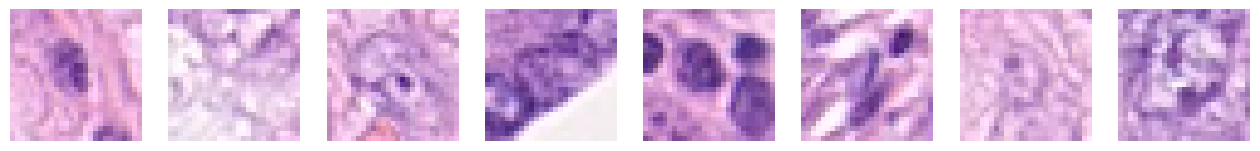

In [27]:
r_inx = np.random.choice(100, 4)
rand_data = data.loc[r_inx,'image_path']
num_images = len(rand_data)
rows = 1
cols = num_images

plt.figure(figsize=(16,5))
for i, image_path in enumerate(rand_data):
    im = np.asarray(Image.open(image_path))
    
    plt.subplot(rows, cols, i+1)
    plt.imshow(im, cmap='gray')
    plt.axis('off')

    
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

Splitting into training and test sets

In [30]:
train_data,test_data = train_test_split(data, test_size=0.2, random_state=42)

In [31]:
train_data,val_data = train_test_split(train_data, test_size=0.25, random_state=42)

In [32]:
print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 12168, Val Data: 4056, Test Data: 4056


Tranforming the data as we dealing with categorical data and not continous data

In [ ]:
train_data['isCancerous'] = train_data['isCancerous'].astype('str')
val_data['isCancerous'] = val_data['isCancerous'].astype('str')

In [391]:
val_data

,patientID,ImageName,isCancerous,image_path
942,66,14402.png,1,image_classification_data/patch_images/14402.png
9228,91,19658.png,0,image_classification_data/patch_images/19658.png
4163,79,10804.png,0,image_classification_data/patch_images/10804.png
1314,9,7730.png,0,image_classification_data/patch_images/7730.png
4431,23,20269.png,0,image_classification_data/patch_images/20269.png
...,...,...,...,...
7334,46,3328.png,1,image_classification_data/patch_images/3328.png
5411,81,15416.png,0,image_classification_data/patch_images/15416.png
8771,91,19152.png,0,image_classification_data/patch_images/19152.png
217,63,18776.png,0,image_classification_data/patch_images/18776.png


## Build the Baseline to classify if it is cancerous using MLP (Model 1.1)


Starting with a baseline model which will be tuned
<br>Lets start with `HIDDEN_LAYER_DIM = 256` as the our baseline to begin with.
<br>We will use for now `optimizer = adam` it has fast convergence and adaptable learning rates.
<br>We are using `batch_size = 32`
<br>Taking random value for `Epoch = 100`
<br>Activation Function as `relu`

In [128]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 2

In [129]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [120]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 2187)              0         
                                                                 
 dense_30 (Dense)            (None, 256)               560128    
                                                                 
 dense_31 (Dense)            (None, 2)                 514       
                                                                 
Total params: 560,642
Trainable params: 560,642
Non-trainable params: 0
_________________________________________________________________


In [130]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [131]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    #rotation_range=20,  # Randomly rotate images by 20 degrees
    #width_shift_range=0.1,  # Randomly shift images horizontally by 10%
    #height_shift_range=0.1,  # Randomly shift images vertically by 10%
    #zoom_range=0.1,  # Randomly zoom in on images by 10%
    #horizontal_flip=True  # Randomly flip images horizontally
)

batch_size = 32

train_generator = datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="image_path",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="image_path",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 12168 validated image filenames belonging to 2 classes.
Found 4056 validated image filenames belonging to 2 classes.


In [136]:
history = model.fit(train_generator, validation_data = validation_generator, epochs=100, verbose=0)

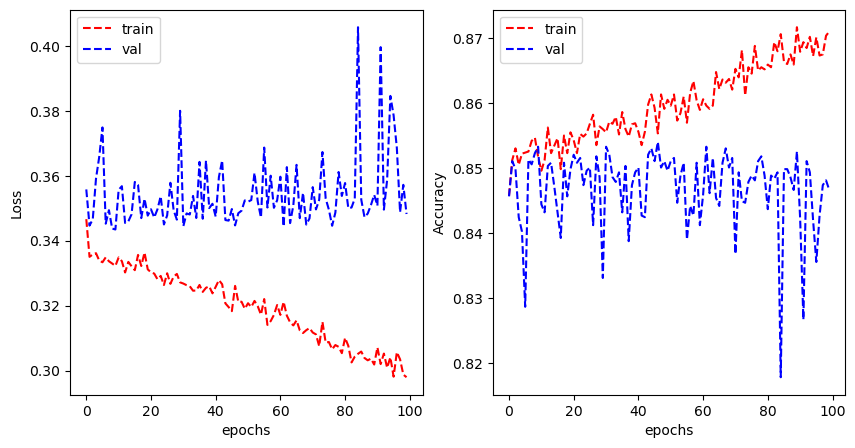

In [137]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'r--')
plt.plot(history.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['categorical_accuracy'], 'r--')
plt.plot(history.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


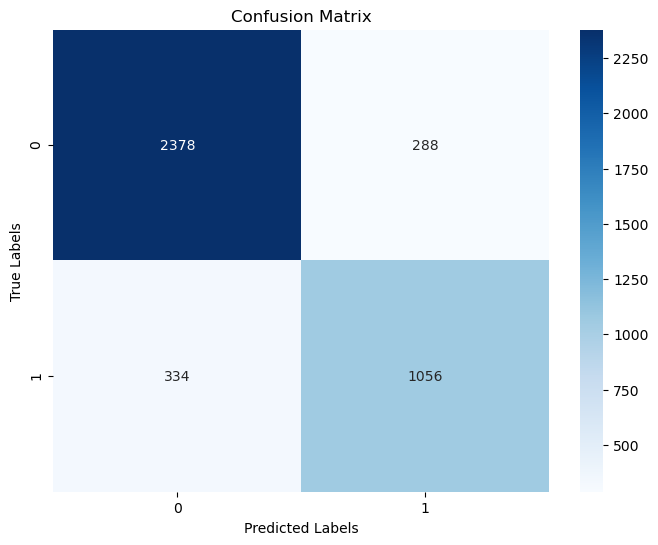

In [138]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [139]:
from sklearn.metrics import classification_report
y_pred_probs = model.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2666
           1       0.79      0.76      0.77      1390

    accuracy                           0.85      4056
   macro avg       0.83      0.83      0.83      4056
weighted avg       0.85      0.85      0.85      4056



In [390]:
val_data

,patientID,ImageName,isCancerous,image_path
942,66,14402.png,1,image_classification_data/patch_images/14402.png
9228,91,19658.png,0,image_classification_data/patch_images/19658.png
4163,79,10804.png,0,image_classification_data/patch_images/10804.png
1314,9,7730.png,0,image_classification_data/patch_images/7730.png
4431,23,20269.png,0,image_classification_data/patch_images/20269.png
...,...,...,...,...
7334,46,3328.png,1,image_classification_data/patch_images/3328.png
5411,81,15416.png,0,image_classification_data/patch_images/15416.png
8771,91,19152.png,0,image_classification_data/patch_images/19152.png
217,63,18776.png,0,image_classification_data/patch_images/18776.png


In [392]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels,y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.8228279386712095
Recall: 0.6949640287769784
F1 Score: 0.7535101404056161
AUC Score: 0.8084722619503795
Specificity: 0.921980495123781


#### Observation

- Running the MLP model with 100 epochs showed that the model was starting overfit on the training model
- Model Accuracy 0.85, F1 score 0.77, Recall 0.75, AUC 0.82 
- As the number of epochs continues to increase, the validation loss will eventually start to increase,and training loss is decreasing indicating that the model is no longer learning and has become overfitted

#### Conclusion

- Using a model Epochs as the model started overfitting after `Epoch=50`

## Baseline with 50 Epochs (Model 1.2)

In [141]:
history_50 = model.fit(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

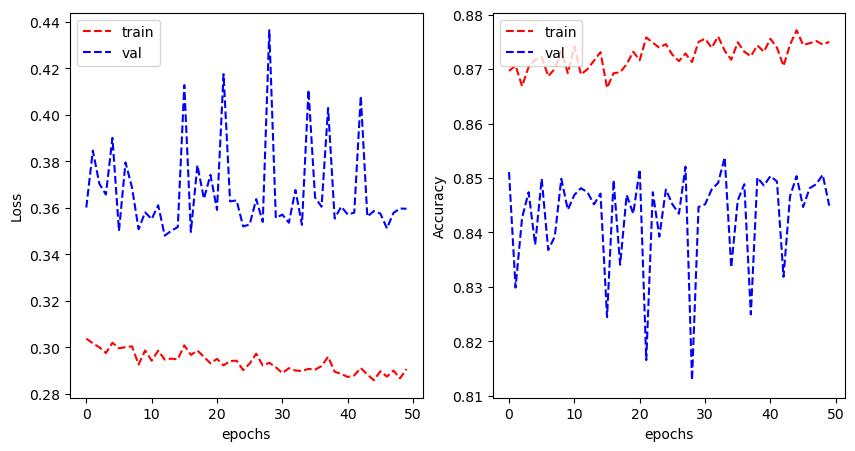

In [142]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_50.history['loss'], 'r--')
plt.plot(history_50.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_50.history['categorical_accuracy'], 'r--')
plt.plot(history_50.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

## Baseline with increasing epochs by 10 (Model 1.3)

In [143]:
history_epoch = model.fit(train_generator, validation_data = validation_generator, epochs=60, verbose=0)

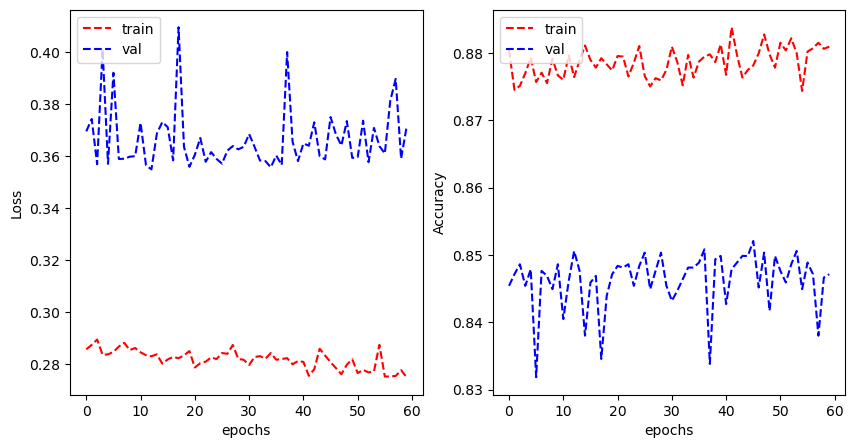

In [144]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_epoch.history['loss'], 'r--')
plt.plot(history_epoch.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_epoch.history['categorical_accuracy'], 'r--')
plt.plot(history_epoch.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Increasing the value of epochs by 10 has lead to the model being overfitted

## Baseline with less epochs

reducing epochs by 20 (Model 1.3)

In [145]:
history_lepoch = model.fit(train_generator, validation_data = validation_generator, epochs=30, verbose=0)

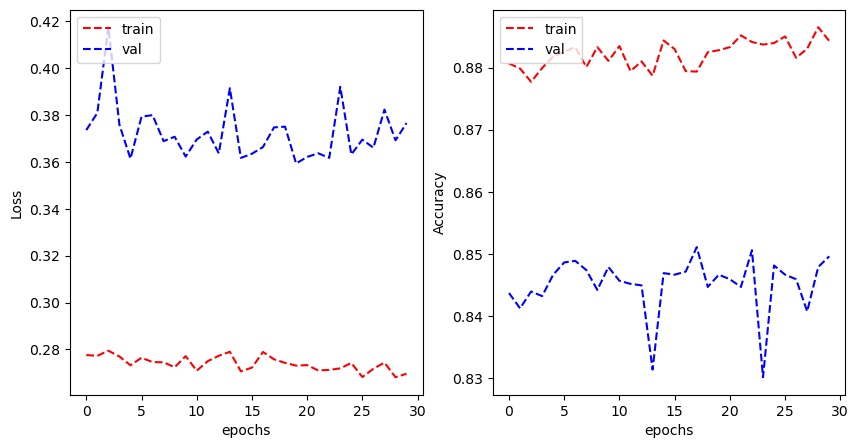

In [146]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_lepoch.history['loss'], 'r--')
plt.plot(history_lepoch.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_lepoch.history['categorical_accuracy'], 'r--')
plt.plot(history_lepoch.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

further reducing epochs by 10 (Model 1.4)

In [147]:
history_llepoch = model.fit(train_generator, validation_data = validation_generator, epochs=20, verbose=0)

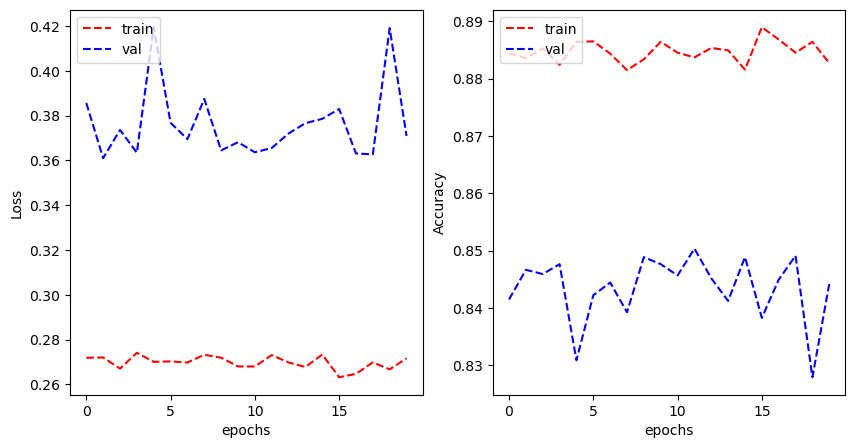

In [148]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_llepoch.history['loss'], 'r--')
plt.plot(history_llepoch.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_llepoch.history['categorical_accuracy'], 'r--')
plt.plot(history_llepoch.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

The Model seems to be performing better under epoch 50
- Though epoch 30 looks more stable and compared to 50 and 60
- also there is a gradual decline in the training loss in epoch 30 compared to epoch 20 which shows the model is optimizing
- However as there is a gap between training and validationthis model does indicate overfitting towards the training data
- Therefore selecting epoch = 30 and continuing with hyper parameter tuning

## Baseline with reduced hidden layers (Model 1.5)

- As reducing layers will make the model less complex to help with overfitting thus helping with  so experimenting the performance with lesser layers
- With fewer hidden layers, the model has fewer parameters to learn and is less likely to memorize the training data

`HIDDEN_LAYER_DIM=128`

In [149]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 128
OUTPUT_CLASSES = 2

In [150]:
model_128 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [151]:
model_128.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 2187)              0         
                                                                 
 dense_34 (Dense)            (None, 128)               280064    
                                                                 
 dense_35 (Dense)            (None, 2)                 258       
                                                                 
Total params: 280,322
Trainable params: 280,322
Non-trainable params: 0
_________________________________________________________________


In [152]:
model_128.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [154]:
history_128 = model_128.fit(train_generator, validation_data = validation_generator, epochs=30, verbose=0)

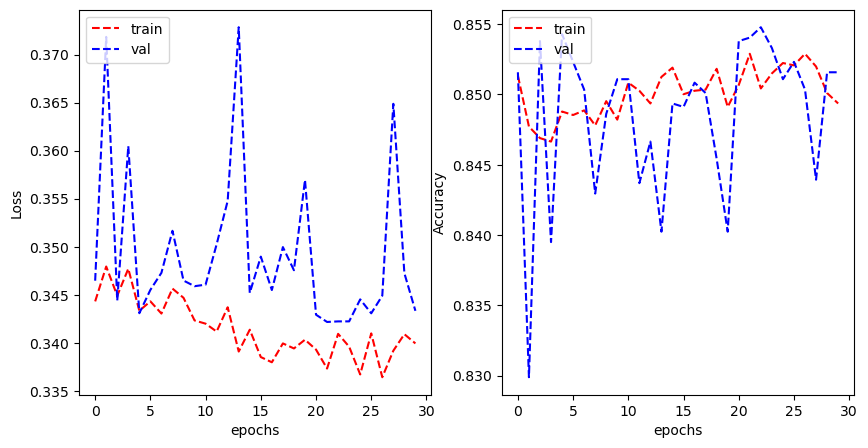

In [155]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_128.history['loss'], 'r--')
plt.plot(history_128.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_128.history['categorical_accuracy'], 'r--')
plt.plot(history_128.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


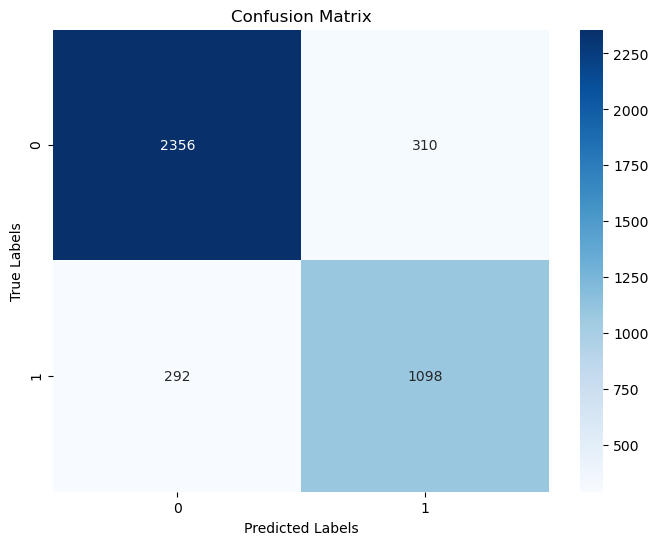

In [156]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_128.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [157]:
from sklearn.metrics import classification_report
y_pred_probs = model_128.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2666
           1       0.78      0.79      0.78      1390

    accuracy                           0.85      4056
   macro avg       0.83      0.84      0.84      4056
weighted avg       0.85      0.85      0.85      4056



In [158]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_128.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.7798295454545454
Recall: 0.7899280575539568
F1 Score: 0.7848463187991421
AUC Score: 0.8368244938932575
Specificity: 0.8837209302325582


## Observation

- This model performance seems better
- as the gap between the accuracy of training and validation has reduced
- Also Accuracy 0.85, Recall 0.78, F1 score 0.78, AUC score 0.83

# Conclusion

- choosing this model for now

## Experimenting with further lower hidden layer units (Model 1.6)

 Taking Hidden_layer_dim as 64 

In [159]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 64
OUTPUT_CLASSES = 2

In [160]:
model_64 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [162]:
model_64.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 2187)              0         
                                                                 
 dense_36 (Dense)            (None, 64)                140032    
                                                                 
 dense_37 (Dense)            (None, 2)                 130       
                                                                 
Total params: 140,162
Trainable params: 140,162
Non-trainable params: 0
_________________________________________________________________


In [163]:
model_64.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [164]:
history_64 = model_64.fit(train_generator, validation_data = validation_generator, epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


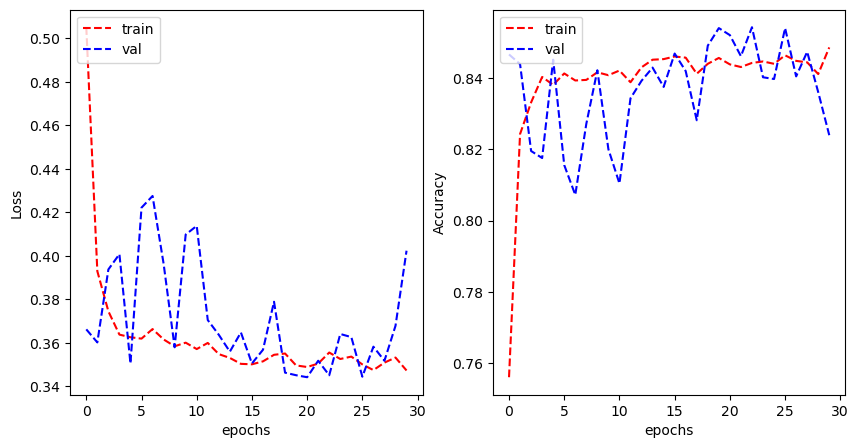

In [165]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_64.history['loss'], 'r--')
plt.plot(history_64.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_64.history['categorical_accuracy'], 'r--')
plt.plot(history_64.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


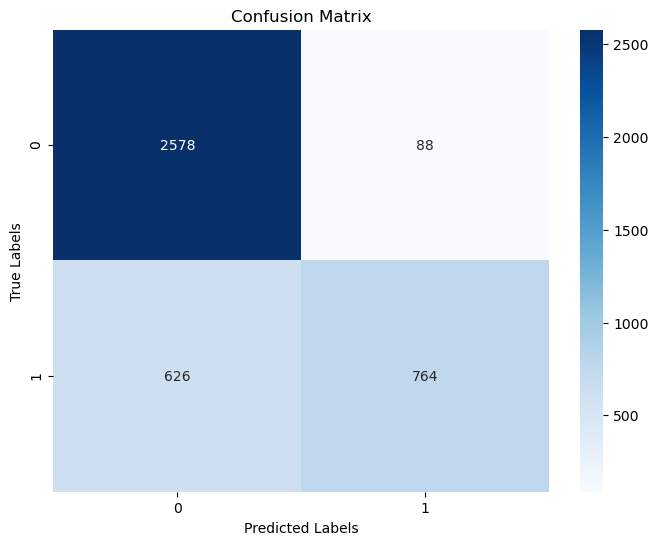

In [166]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_64.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [167]:
from sklearn.metrics import classification_report
y_pred_probs = model_64.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2666
           1       0.90      0.55      0.68      1390

    accuracy                           0.82      4056
   macro avg       0.85      0.76      0.78      4056
weighted avg       0.84      0.82      0.81      4056



In [168]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_64.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.8967136150234741
Recall: 0.5496402877697841
F1 Score: 0.6815343443354148
AUC Score: 0.7583160178533842
Specificity: 0.9669917479369843


## Observation

- This model has significantly affected the value of Recall and F1 score
- Accuracy = 0.82, Recall = 0.54, F1 score = 0.68, AUC score = 0.75


## Conclusion

- Choosing hidden_layer_dim as 128

## Baseline with added hidden layers (Model 1.7)

Just to prove that adding hidden layers wont necessarily help the model inturn will just increase the complexity of the model

In [169]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 128
OUTPUT_CLASSES = 2

In [170]:
model_eh = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [171]:
model_eh.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 2187)              0         
                                                                 
 dense_38 (Dense)            (None, 128)               280064    
                                                                 
 dense_39 (Dense)            (None, 128)               16512     
                                                                 
 dense_40 (Dense)            (None, 2)                 258       
                                                                 
Total params: 296,834
Trainable params: 296,834
Non-trainable params: 0
_________________________________________________________________


In [172]:
model_eh.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [173]:
history_eh = model_eh.fit(train_generator, validation_data = validation_generator, epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


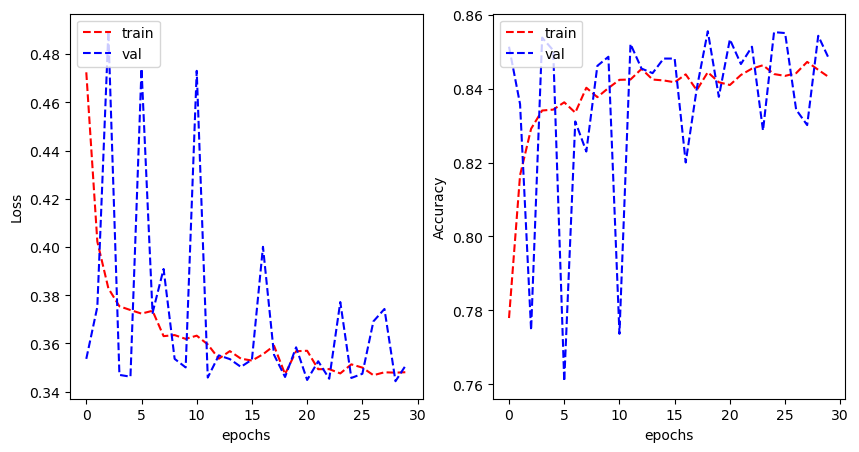

In [174]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_eh.history['loss'], 'r--')
plt.plot(history_eh.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_eh.history['categorical_accuracy'], 'r--')
plt.plot(history_eh.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


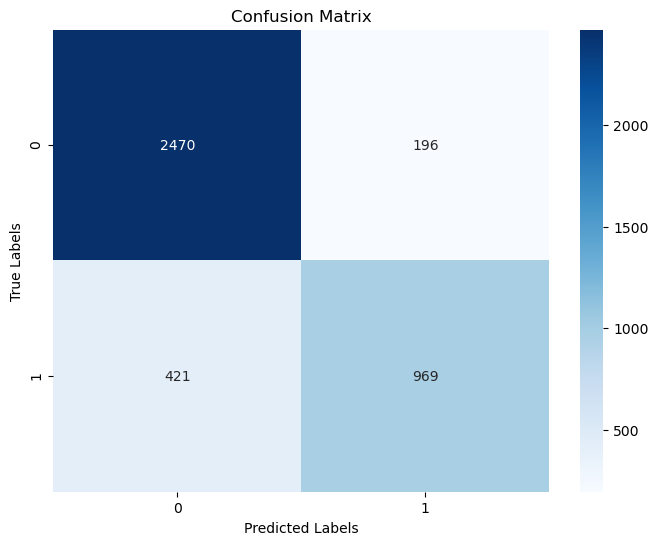

In [175]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_eh.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [176]:
from sklearn.metrics import classification_report
y_pred_probs = model_eh.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2666
           1       0.83      0.70      0.76      1390

    accuracy                           0.85      4056
   macro avg       0.84      0.81      0.82      4056
weighted avg       0.85      0.85      0.84      4056



In [177]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_eh.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.8317596566523605
Recall: 0.6971223021582734
F1 Score: 0.7585127201565559
AUC Score: 0.8118019612816874
Specificity: 0.9264816204051013


#### Observation

- This Model performed quite worse in recall and F1 score and as our objective is prioritize to reduce false negatives in the data
- Accuracy = 0.85, Recall = 0.69, F1 score = 0.75, AUC score = 0.81

#### Conclusion

- We are not adding any additional dense of hidden layers 

## Chosen model with some regularization

In order to further improve on the model adding regularization techniques to the Model such as 
- L1 regularization
- L2 regularization
- Learning rate
- Dropout

#### L1 Regularization (Model 1.8)

To improve on the overfitting of the training data compared to the validation data trying L1 regularization to see if it improves the model performance with default lambda value `0.01`

In [215]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 128
OUTPUT_CLASSES = 2

In [216]:
reg_lambda = 0.01

model_lreg = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(reg_lambda)),
    tf.keras.layers.Dense(OUTPUT_CLASSES, kernel_regularizer=tf.keras.regularizers.l2(reg_lambda),activation='sigmoid')
])

In [217]:
model_lreg.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [218]:
history_lreg = model_lreg.fit(train_generator, validation_data = validation_generator, epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


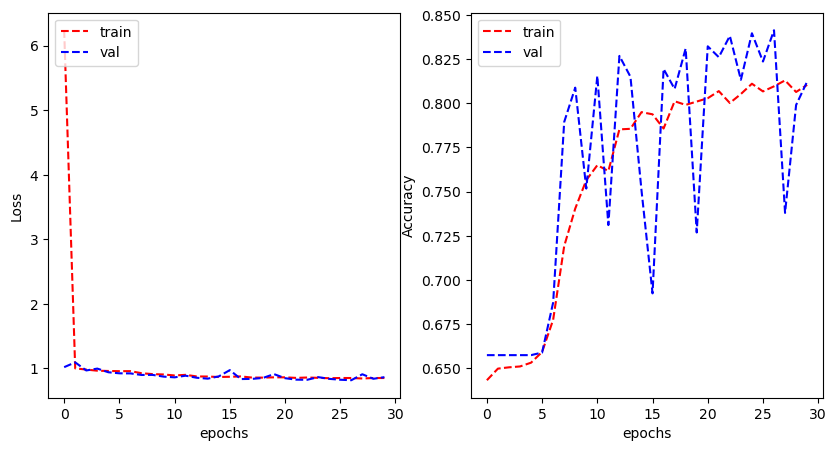

In [219]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_lreg.history['loss'], 'r--')
plt.plot(history_lreg.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_lreg.history['categorical_accuracy'], 'r--')
plt.plot(history_lreg.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


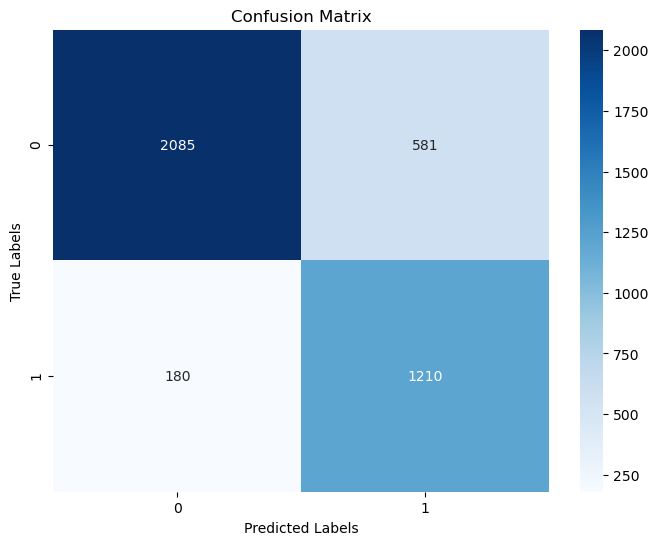

In [220]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_lreg.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [221]:
from sklearn.metrics import classification_report
y_pred_probs = model_lreg.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.78      0.85      2666
           1       0.68      0.87      0.76      1390

    accuracy                           0.81      4056
   macro avg       0.80      0.83      0.80      4056
weighted avg       0.84      0.81      0.82      4056



In [223]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_lreg.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.6756002233389168
Recall: 0.8705035971223022
F1 Score: 0.7607670543854135
AUC Score: 0.8262870573758547
Specificity: 0.7820705176294074


#### Observation

- Model had an overall bad performance compared the chosen model though overfitting has reduced.
- The value of having a good Recall has more emphasis then precision as we want lesser false negative in the predictions.


#### Conclusion

- Though the model has better recall it doesn't make sense to choose a model which is not correctly predicting the labels as compared to the other chosen model(Model 1.5).

#### L1 Regularization (learning rate = 0.001) (Model 1.8)

In [224]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 128
OUTPUT_CLASSES = 2

In [232]:
reg_lambda = 0.001

model_llreg = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(reg_lambda)),
    tf.keras.layers.Dense(OUTPUT_CLASSES, kernel_regularizer=tf.keras.regularizers.l2(reg_lambda),activation='sigmoid')
])

In [233]:
model_llreg.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [234]:
history_llreg = model_llreg.fit(train_generator, validation_data = validation_generator, epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


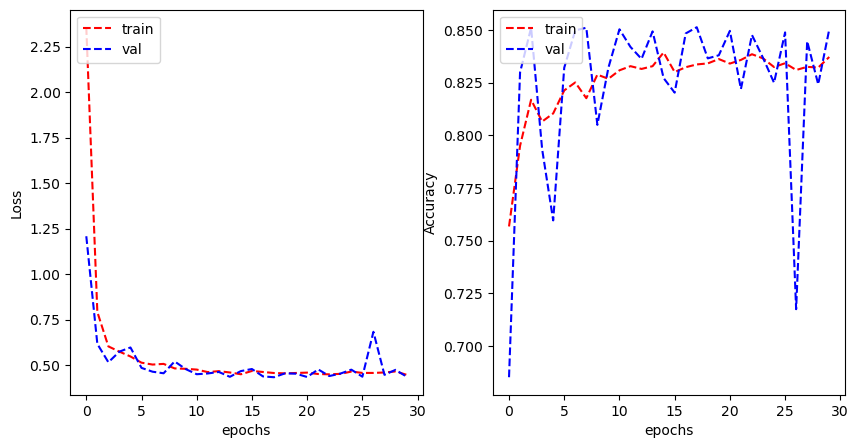

In [235]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_llreg.history['loss'], 'r--')
plt.plot(history_llreg.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_llreg.history['categorical_accuracy'], 'r--')
plt.plot(history_llreg.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


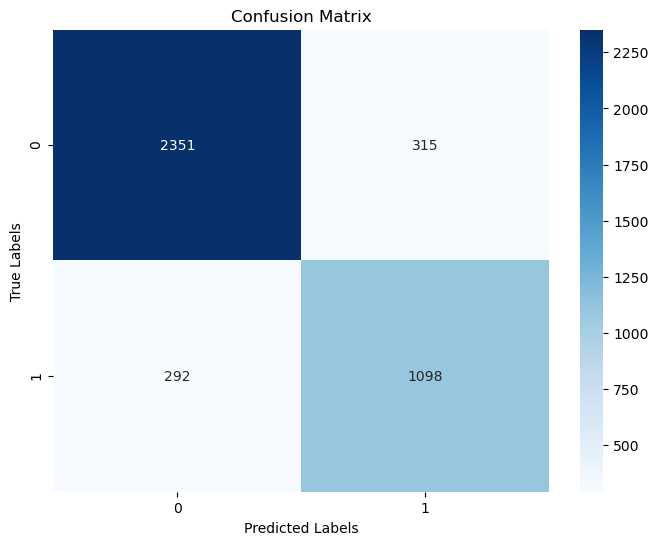

In [236]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_llreg.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [237]:
from sklearn.metrics import classification_report
y_pred_probs = model_llreg.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2666
           1       0.78      0.79      0.78      1390

    accuracy                           0.85      4056
   macro avg       0.83      0.84      0.83      4056
weighted avg       0.85      0.85      0.85      4056



In [238]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_llreg.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.7770700636942676
Recall: 0.7899280575539568
F1 Score: 0.783446307527649
AUC Score: 0.8358867594596491
Specificity: 0.8818454613653414


#### Observation

- The model didn't improve much on the chosen model 

#### Conclusion

In [ ]:
- Trying L2 regualrization

#### L2 Regularization (Model 1.9)

In [206]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 128
OUTPUT_CLASSES = 2

In [207]:
reg_lambda = 0.01

model_reg = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dense(OUTPUT_CLASSES, kernel_regularizer=tf.keras.regularizers.l2(reg_lambda),activation='sigmoid')
])

In [208]:
model_reg.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [209]:
history_reg = model_reg.fit(train_generator, validation_data = validation_generator, epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


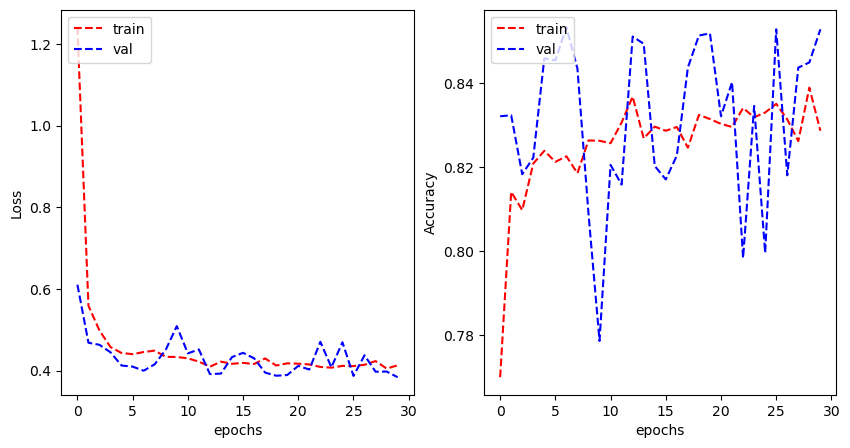

In [210]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_reg.history['loss'], 'r--')
plt.plot(history_reg.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_reg.history['categorical_accuracy'], 'r--')
plt.plot(history_reg.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


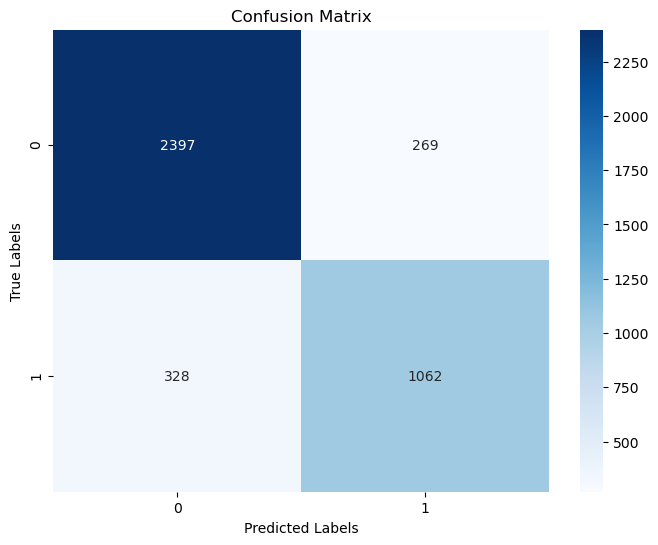

In [211]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_reg.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [212]:
from sklearn.metrics import classification_report
y_pred_probs = model_reg.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2666
           1       0.80      0.76      0.78      1390

    accuracy                           0.85      4056
   macro avg       0.84      0.83      0.83      4056
weighted avg       0.85      0.85      0.85      4056



In [240]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_reg.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.7978963185574756
Recall: 0.7640287769784173
F1 Score: 0.7805953693495038
AUC Score: 0.8315642759610766
Specificity: 0.8990997749437359


#### Observation

- This model was more precise in classifying the images compared to the chosen model but had lower recall then the chosen model(Model 1.5) 

#### Conclusion

- Lets test out the opposite end of the spectrum and try with a lower learning rate

## L2 Regularization with lower learning rate (Model 1.10)

In [241]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 128
OUTPUT_CLASSES = 2

In [243]:
reg_lambda = 0.001

model_rreg = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dense(OUTPUT_CLASSES, kernel_regularizer=tf.keras.regularizers.l2(reg_lambda),activation='sigmoid')
])

In [244]:
model_rreg.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [245]:
history_rreg = model_rreg.fit(train_generator, validation_data = validation_generator, epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


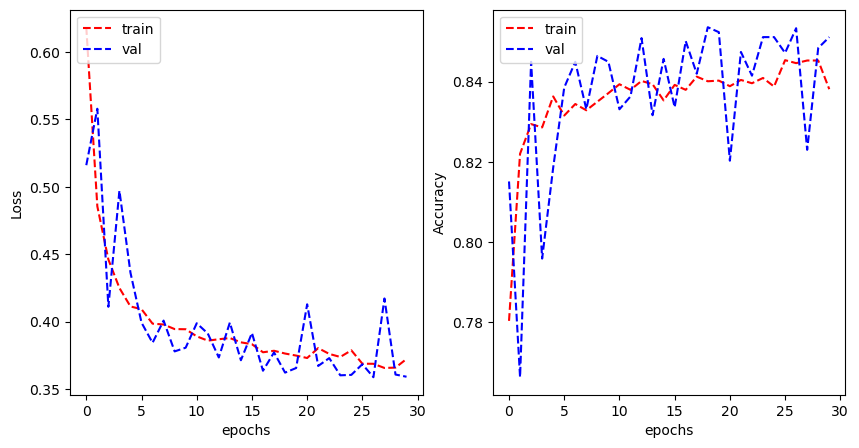

In [246]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_rreg.history['loss'], 'r--')
plt.plot(history_rreg.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_rreg.history['categorical_accuracy'], 'r--')
plt.plot(history_rreg.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


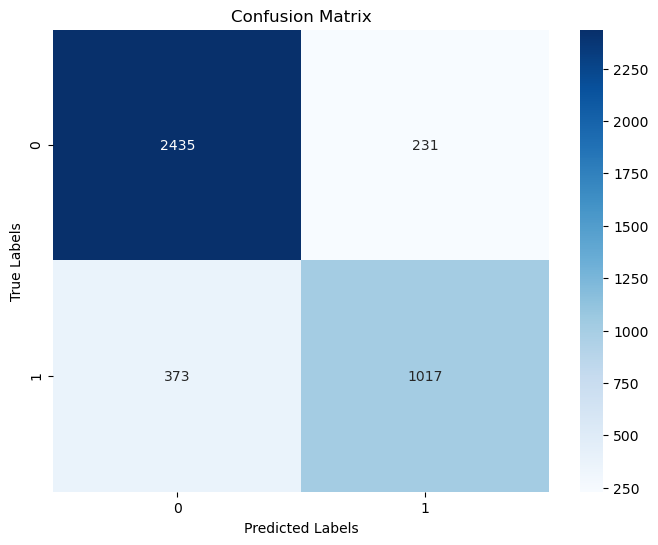

In [247]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_rreg.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [248]:
from sklearn.metrics import classification_report
y_pred_probs = model_rreg.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2666
           1       0.81      0.73      0.77      1390

    accuracy                           0.85      4056
   macro avg       0.84      0.82      0.83      4056
weighted avg       0.85      0.85      0.85      4056



In [249]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_rreg.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.8149038461538461
Recall: 0.7316546762589928
F1 Score: 0.7710386656557999
AUC Score: 0.8225040072967883
Specificity: 0.9133533383345837


#### Observation

- The Model is performing worse in terms of recall 

#### Conclusion

- Trying by adding dropouts

## Baseline with some dropout

To further improve on the overfitting lets try some dropout layers



#### dropout = 0.1 (Model 1.11)

In [258]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 128
OUTPUT_CLASSES = 2

In [250]:


model_drop = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(OUTPUT_CLASSES,activation='sigmoid')
])

In [251]:
model_drop.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [252]:
history_drop = model_drop.fit(train_generator, validation_data = validation_generator, epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


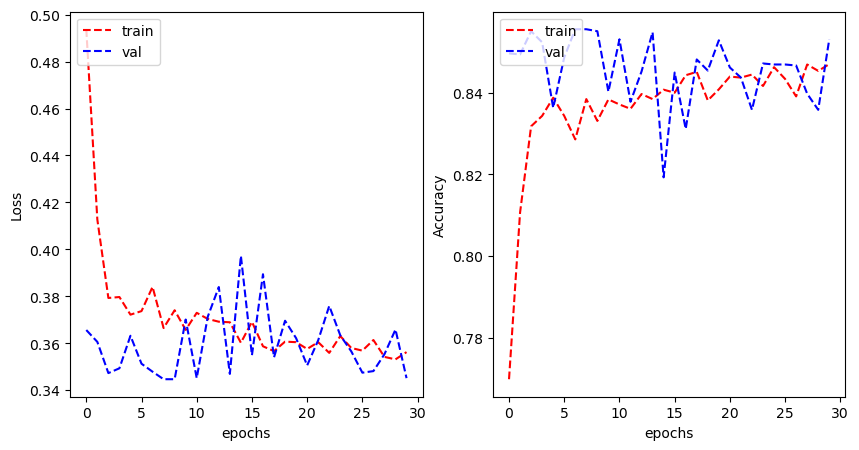

In [253]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_drop.history['loss'], 'r--')
plt.plot(history_drop.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_drop.history['categorical_accuracy'], 'r--')
plt.plot(history_drop.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


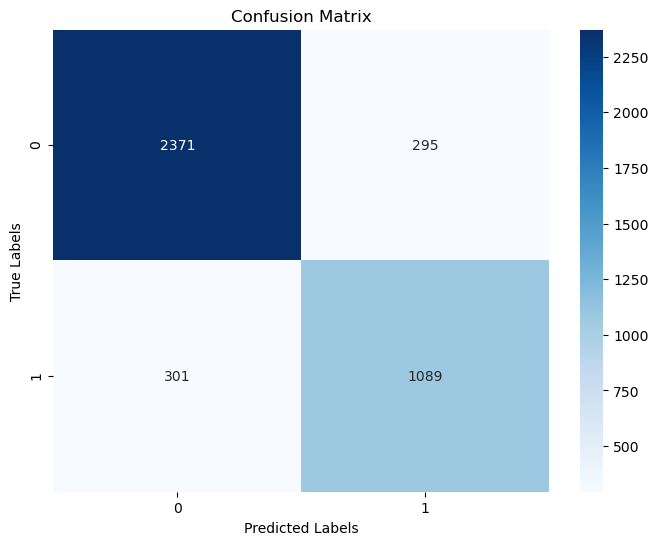

In [254]:
from sklearn.metrics import confusion_matrix


test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_drop.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [255]:
from sklearn.metrics import classification_report
y_pred_probs = model_drop.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2666
           1       0.79      0.78      0.79      1390

    accuracy                           0.85      4056
   macro avg       0.84      0.84      0.84      4056
weighted avg       0.85      0.85      0.85      4056



In [257]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_drop.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.786849710982659
Recall: 0.7834532374100719
F1 Score: 0.7851478010093728
AUC Score: 0.8364002871221402
Specificity: 0.8893473368342085


#### observation

- Since the Recall value and confusion matrix is better in our chosen model 1.5 going ahead with it

#### dropout = 0.3 (Model 1.12)

Just Experimenting to see if recall value changes with dropout increasing

In [268]:
model_drop_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(OUTPUT_CLASSES,activation='sigmoid')
])

In [269]:
model_drop_3.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [270]:
history_drop_3 = model_drop_3.fit(train_generator, validation_data = validation_generator, epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


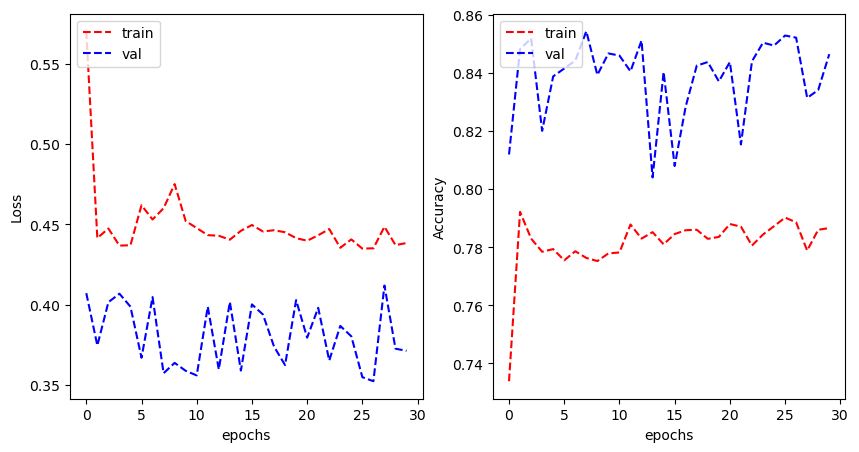

In [283]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_drop_3.history['loss'], 'r--')
plt.plot(history_drop_3.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_drop_3.history['categorical_accuracy'], 'r--')
plt.plot(history_drop_3.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


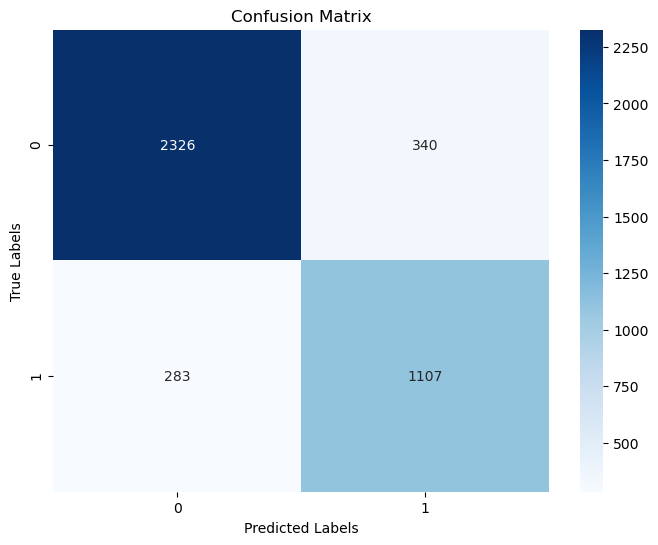

In [271]:
from sklearn.metrics import confusion_matrix


test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_drop_3.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [272]:
from sklearn.metrics import classification_report
y_pred_probs = model_drop_3.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2666
           1       0.77      0.80      0.78      1390

    accuracy                           0.85      4056
   macro avg       0.83      0.83      0.83      4056
weighted avg       0.85      0.85      0.85      4056



In [273]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_drop_3.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.7650310988251555
Recall: 0.7964028776978417
F1 Score: 0.7804018329221007
AUC Score: 0.8344354973635495
Specificity: 0.8724681170292573


#### observation

- model has started to underfit

## Using LeNet CNN Model (Model 2.1)

As the data consists of small images using LeNet model which is a simple CNN model to classify the images
- Lets start with `HIDDEN_LAYER_DIM = 64` as the our baseline to begin with. 
- We will use for now `optimizer = SGD` good for large dataset. 
- We are using `batch_size = 32` 
- Taking random value for `Epoch = 30` 
- Activation Function as `relu`

In [399]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 64
OUTPUT_CLASSES = 2

In [400]:
reg_lambda = 0.01
OUTPUT_CLASSES = 2

model_leNet_baseline = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [401]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_baseline.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_base = model_leNet_baseline.fit(train_generator, 
                                    validation_data = validation_generator, 
                                    epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


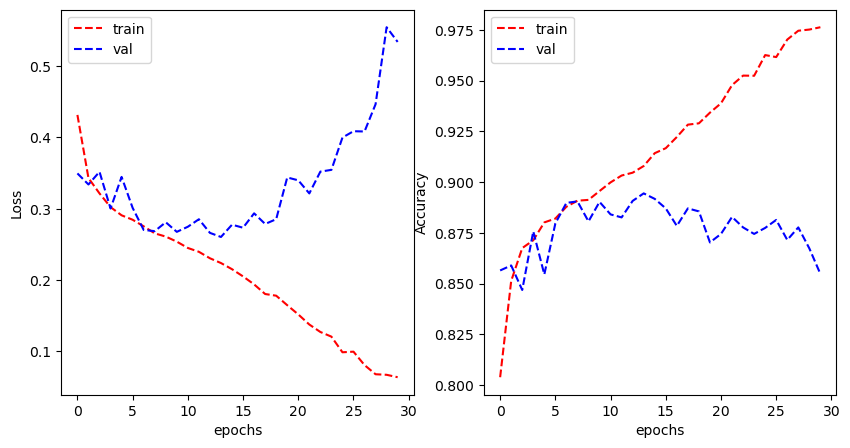

In [402]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_base.history['loss'], 'r--')
plt.plot(history_leNet_base.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_base.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_base.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


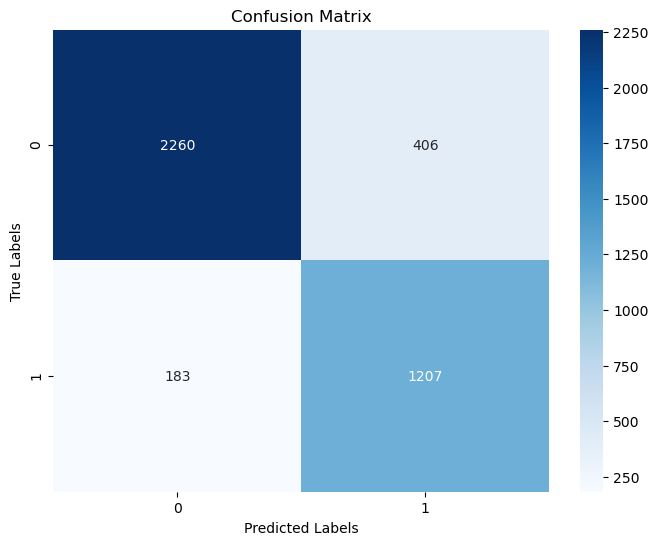

In [403]:
from sklearn.metrics import confusion_matrix


test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_baseline.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [404]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_baseline.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.85      0.88      2666
           1       0.75      0.87      0.80      1390

    accuracy                           0.85      4056
   macro avg       0.84      0.86      0.84      4056
weighted avg       0.86      0.85      0.86      4056



In [405]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_baseline.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.7482951022938623
Recall: 0.8683453237410071
F1 Score: 0.8038628038628038
AUC Score: 0.8580286258615013
Specificity: 0.8477119279819955


#### observation 

- The Model is overfitted with the training data


#### Conclusion

- Reducing the complexity by reducing the hidden_layer_dim

## Using leNet with lower hidden_layer_dim 32

In [299]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 32
OUTPUT_CLASSES = 2

In [393]:
reg_lambda = 0.01
OUTPUT_CLASSES = 2

model_leNet_layer = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [394]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_layer.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_layer = model_leNet_layer.fit(train_generator, 
                                    validation_data = validation_generator, 
                                    epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


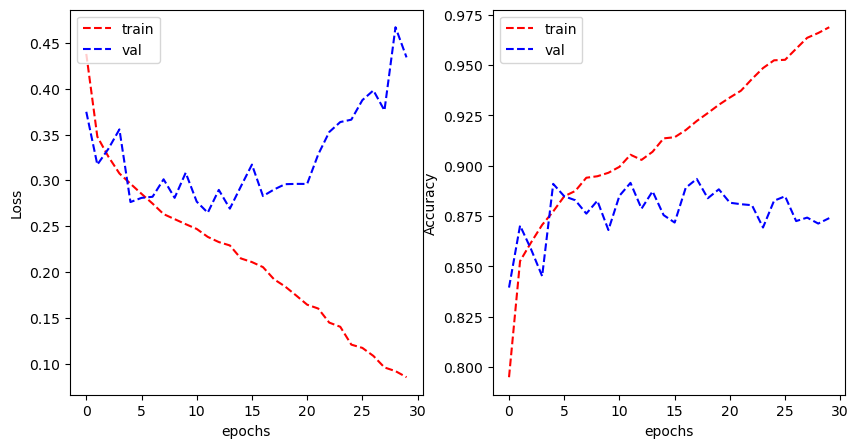

In [395]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_layer.history['loss'], 'r--')
plt.plot(history_leNet_layer.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_layer.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_layer.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


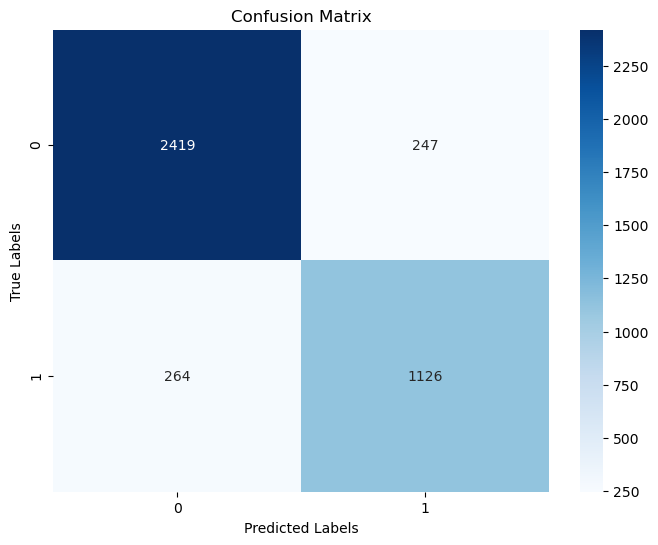

In [396]:
from sklearn.metrics import confusion_matrix


test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_layer.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [397]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_layer.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2666
           1       0.82      0.81      0.82      1390

    accuracy                           0.87      4056
   macro avg       0.86      0.86      0.86      4056
weighted avg       0.87      0.87      0.87      4056



In [398]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_layer.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.8201019664967225
Recall: 0.8100719424460432
F1 Score: 0.8150560984437206
AUC Score: 0.8587118902027665
Specificity: 0.9073518379594899


#### observation 

- The model didn't perform better in terms of recall lets try reducing the dimensions further

# Using hidden_layer_dim =16 (Model 2.3)

In [406]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 16
OUTPUT_CLASSES = 2

In [407]:
reg_lambda = 0.01
OUTPUT_CLASSES = 2

model_leNet_64 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [413]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_64.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_64 = model_leNet_64.fit(train_generator, 
                                    validation_data = validation_generator, 
                                    epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


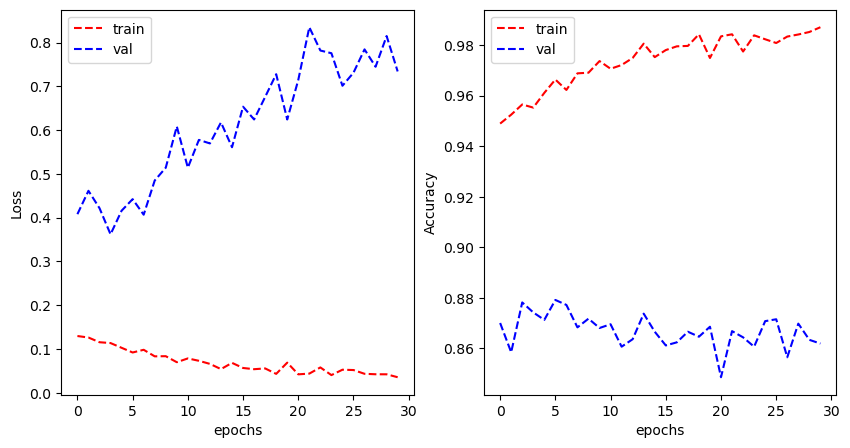

In [414]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_64.history['loss'], 'r--')
plt.plot(history_leNet_64.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_64.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_64.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


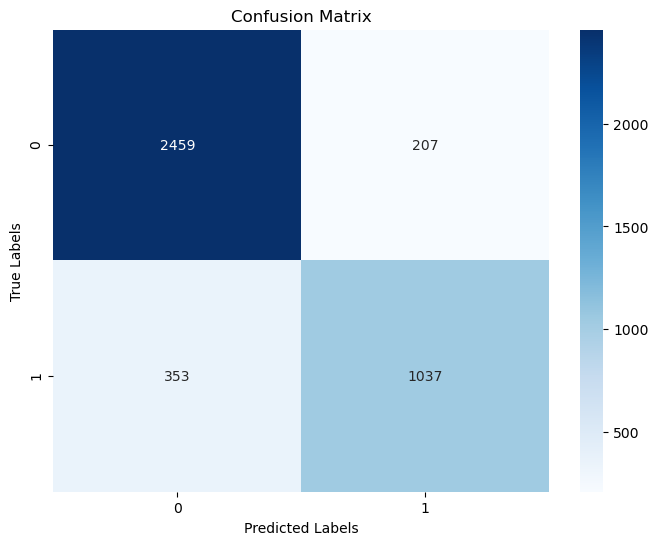

In [415]:
from sklearn.metrics import confusion_matrix


test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_64.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [416]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_64.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      2666
           1       0.83      0.75      0.79      1390

    accuracy                           0.86      4056
   macro avg       0.85      0.83      0.84      4056
weighted avg       0.86      0.86      0.86      4056



In [417]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_64.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.8336012861736335
Recall: 0.746043165467626
F1 Score: 0.7873955960516325
AUC Score: 0.8341993771824252
Specificity: 0.9223555888972244


#### Observation

- The model underfitted lets try increasing the hidden_layer_dim to 128

## Using leNet with lower hidden_layer_dim 128 (Model 2.4)

In [418]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 128
OUTPUT_CLASSES = 2

In [419]:
reg_lambda = 0.01
OUTPUT_CLASSES = 2

model_leNet_32 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [420]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_32.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_32 = model_leNet_32.fit(train_generator, 
                                    validation_data = validation_generator, 
                                    epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


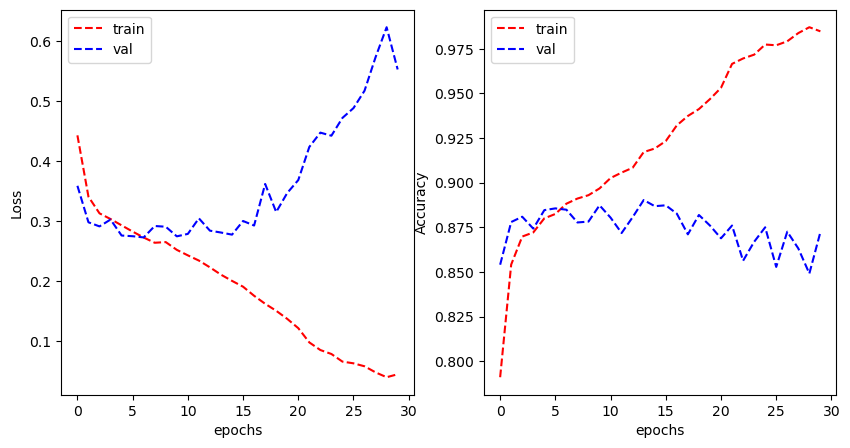

In [421]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_32.history['loss'], 'r--')
plt.plot(history_leNet_32.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_32.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_32.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


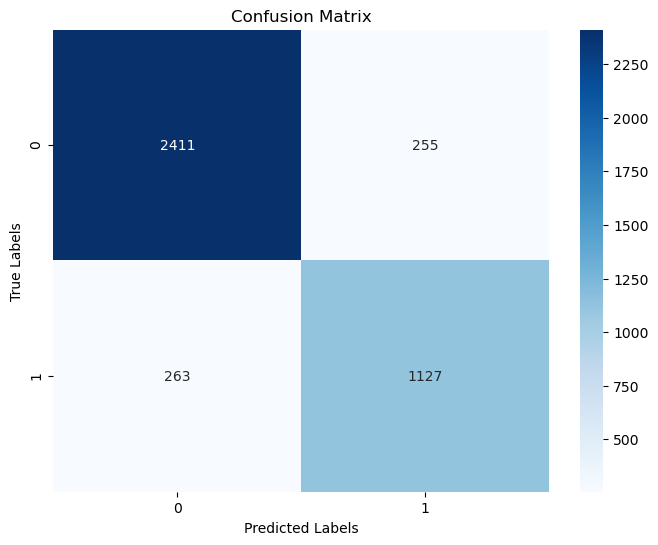

In [422]:
from sklearn.metrics import confusion_matrix


test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_32.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [423]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_32.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2666
           1       0.82      0.81      0.81      1390

    accuracy                           0.87      4056
   macro avg       0.86      0.86      0.86      4056
weighted avg       0.87      0.87      0.87      4056



In [424]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_32.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.8154848046309696
Recall: 0.8107913669064748
F1 Score: 0.813131313131313
AUC Score: 0.8575712273392089
Specificity: 0.904351087771943


#### observation

- initial model performed well in terms of recall

## Using a lower learning rate (Model 2.5)

As the model is overfitted trying a lower learning rate = 0.001

In [320]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 32
OUTPUT_CLASSES = 2

In [321]:
reg_lambda = 0.001
OUTPUT_CLASSES = 2

model_leNet_lr = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [323]:
sgd = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_lr.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_lr = model_leNet_lr.fit(train_generator, 
                                    validation_data = validation_generator, 
                                    epochs=30, verbose=0)

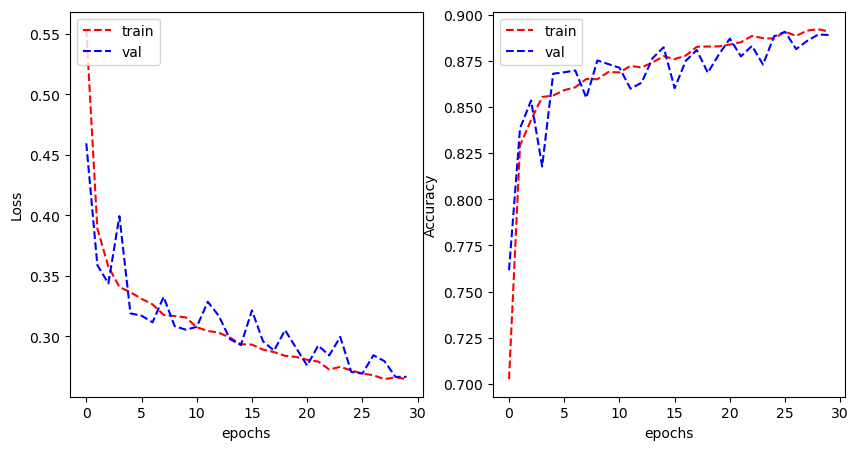

In [324]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_lr.history['loss'], 'r--')
plt.plot(history_leNet_lr.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_lr.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_lr.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


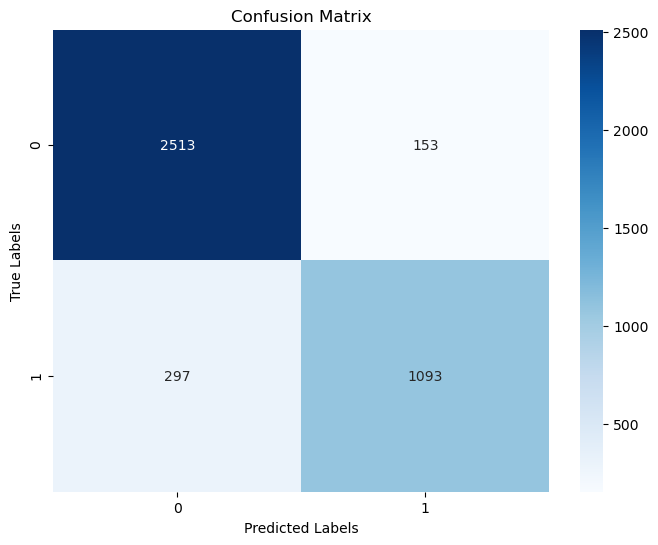

In [325]:
from sklearn.metrics import confusion_matrix


test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_lr.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [326]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_lr.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      2666
           1       0.88      0.79      0.83      1390

    accuracy                           0.89      4056
   macro avg       0.89      0.86      0.87      4056
weighted avg       0.89      0.89      0.89      4056



In [327]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_lr.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.877207062600321
Recall: 0.7863309352517985
F1 Score: 0.8292867981790593
AUC Score: 0.8644707939574823
Specificity: 0.9426106526631658


#### observation

- The model performed well in terms of overfitting but recall value was affected trying learning rate = 0.005

## Using a lower learning rate (Model 2.6)

learning rate = 0.005

In [328]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 32
OUTPUT_CLASSES = 2

In [329]:
reg_lambda = 0.005
OUTPUT_CLASSES = 2

model_leNet_llr = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [330]:
sgd = tf.keras.optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_llr.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_llr = model_leNet_llr.fit(train_generator, 
                                    validation_data = validation_generator, 
                                    epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


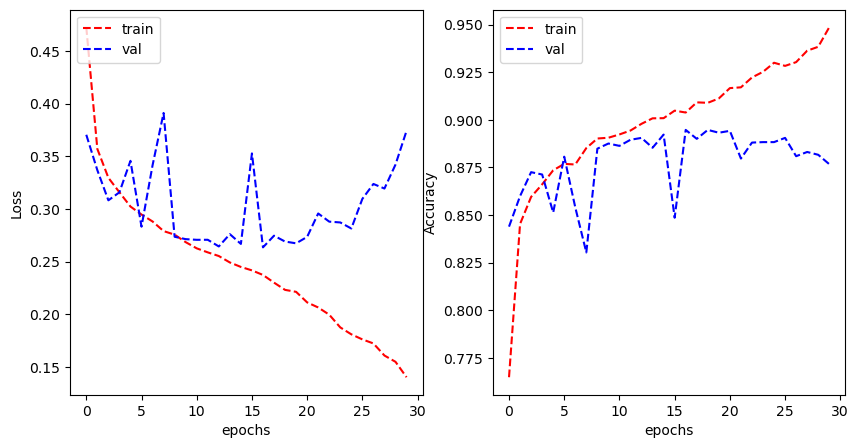

In [331]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_llr.history['loss'], 'r--')
plt.plot(history_leNet_llr.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_llr.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_llr.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


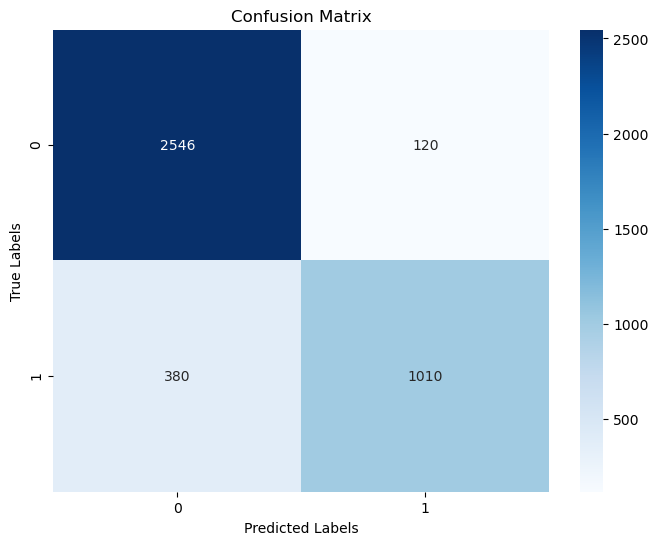

In [332]:
from sklearn.metrics import confusion_matrix


test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_llr.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [333]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_llr.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2666
           1       0.89      0.73      0.80      1390

    accuracy                           0.88      4056
   macro avg       0.88      0.84      0.86      4056
weighted avg       0.88      0.88      0.87      4056



In [334]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_llr.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.8938053097345132
Recall: 0.7266187050359713
F1 Score: 0.8015873015873016
AUC Score: 0.8408037261113839
Specificity: 0.9549887471867967


#### Observation

This model performed worse then previous one taking learning rate as 0.001

## Reducing the number of filters (Model 2.7)

In [ ]:
reducing the complexity of the model

In [335]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 32
OUTPUT_CLASSES = 2

In [337]:
reg_lambda = 0.001
OUTPUT_CLASSES = 2

model_leNet_lf = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [339]:
sgd = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_lf.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_lf = model_leNet_lf.fit(train_generator, 
                                    validation_data = validation_generator, 
                                    epochs=30, verbose=0)

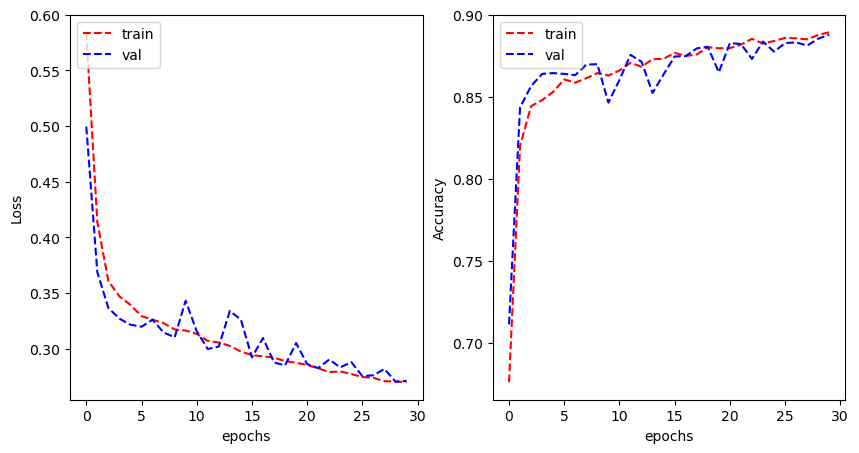

In [340]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_lf.history['loss'], 'r--')
plt.plot(history_leNet_lf.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_lf.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_lf.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


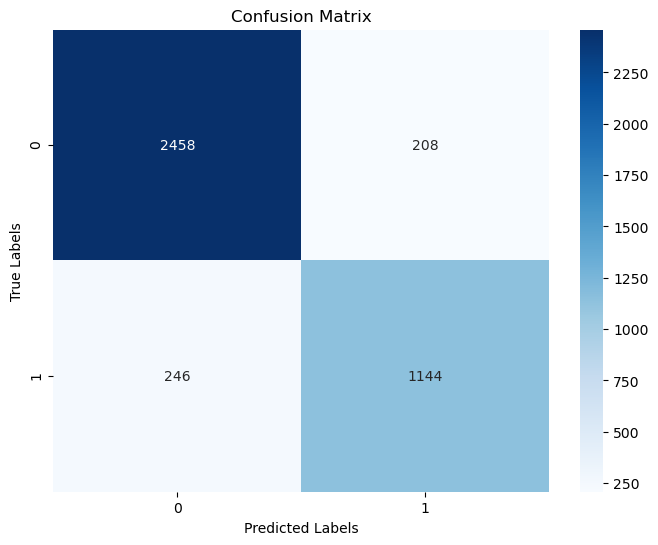

In [341]:
from sklearn.metrics import confusion_matrix


test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_lf.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [342]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_lf.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      2666
           1       0.85      0.82      0.83      1390

    accuracy                           0.89      4056
   macro avg       0.88      0.87      0.87      4056
weighted avg       0.89      0.89      0.89      4056



In [343]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_lf.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.8461538461538461
Recall: 0.823021582733813
F1 Score: 0.8344274252370532
AUC Score: 0.8725010389287969
Specificity: 0.921980495123781


#### observation 

- This model has performed better in terms of the fit and the Recall score

## Modifying the kernel size (Model 2.8)

increasing the kernel size would help the model in capturing more spatial information in each convolutional layer.

In [335]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 32
OUTPUT_CLASSES = 2

In [349]:
reg_lambda = 0.001
OUTPUT_CLASSES = 2

model_leNet_ks = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [350]:
sgd = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_ks.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_ks = model_leNet_ks.fit(train_generator, 
                                    validation_data = validation_generator, 
                                    epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


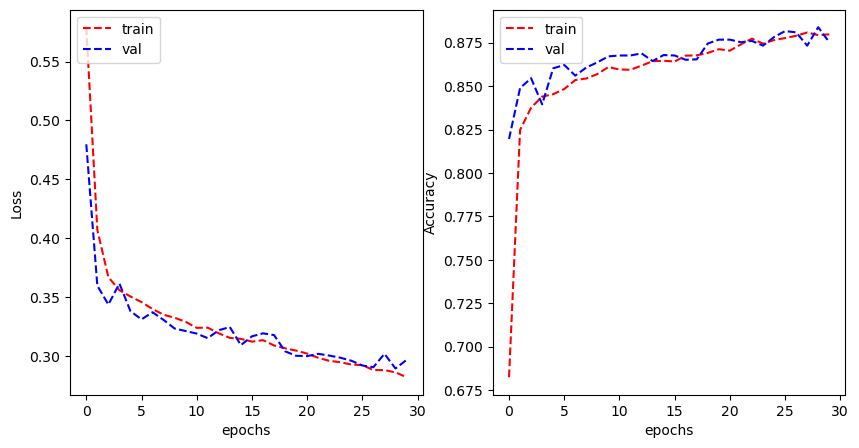

In [351]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_ks.history['loss'], 'r--')
plt.plot(history_leNet_ks.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_ks.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_ks.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


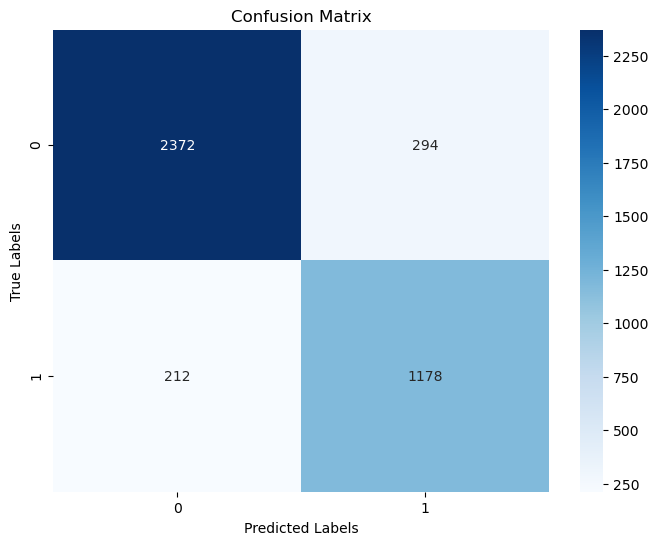

In [352]:
from sklearn.metrics import confusion_matrix


test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_ks.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [353]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_ks.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2666
           1       0.80      0.85      0.82      1390

    accuracy                           0.88      4056
   macro avg       0.86      0.87      0.86      4056
weighted avg       0.88      0.88      0.88      4056



In [354]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_ks.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.8002717391304348
Recall: 0.8474820143884892
F1 Score: 0.8232005590496158
AUC Score: 0.8686022224980706
Specificity: 0.8897224306076519


#### observation 

- This model has performed better in terms of the fit and the Recall score

# Experimenting with Pooling size (Model 2.9)

increasing pool size can helps in downscaling the feature maps and retain only important features,thus helping with overfitting, taking pool size =(3,3)


In [355]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 32
OUTPUT_CLASSES = 2

In [356]:
reg_lambda = 0.001
OUTPUT_CLASSES = 2

model_leNet_ps = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(3, 3)),
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [357]:
sgd = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_ps.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_ps = model_leNet_ps.fit(train_generator, 
                                    validation_data = validation_generator, 
                                    epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


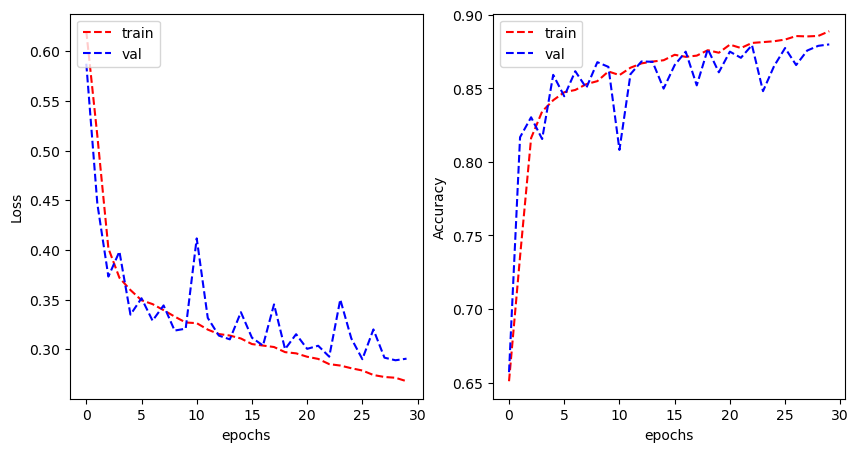

In [358]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_ps.history['loss'], 'r--')
plt.plot(history_leNet_ps.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_ps.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_ps.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


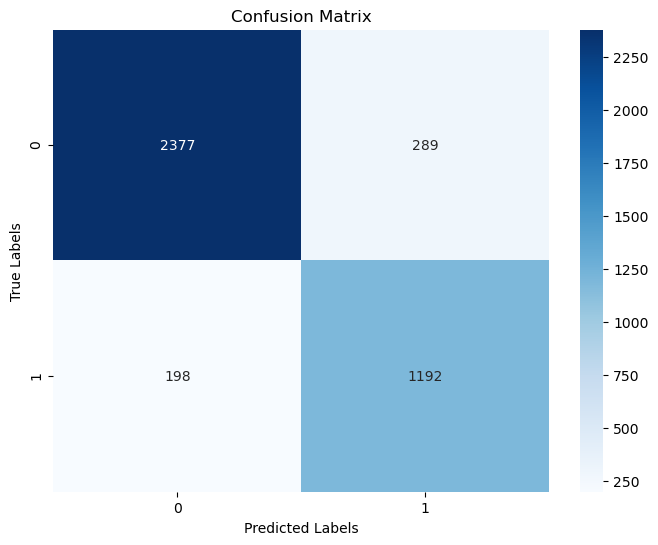

In [359]:
from sklearn.metrics import confusion_matrix


test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_ps.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [360]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_ps.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      2666
           1       0.80      0.86      0.83      1390

    accuracy                           0.88      4056
   macro avg       0.86      0.87      0.87      4056
weighted avg       0.88      0.88      0.88      4056



In [361]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_ps.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.8048615800135044
Recall: 0.8575539568345324
F1 Score: 0.8303726924416579
AUC Score: 0.8745759281547004
Specificity: 0.8915978994748687


## Using leNet CNN with dropout (Model 2.10)

Model seems a little overfitted so using dropout = 0.1

In [362]:


reg_lambda = 0.001
OUTPUT_CLASSES = 2

model_leNet_drop = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(3, 3)),
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [363]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_drop.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_drop = model_leNet_drop.fit(train_generator, 
                                    validation_data = validation_generator, 
                                    epochs=50, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


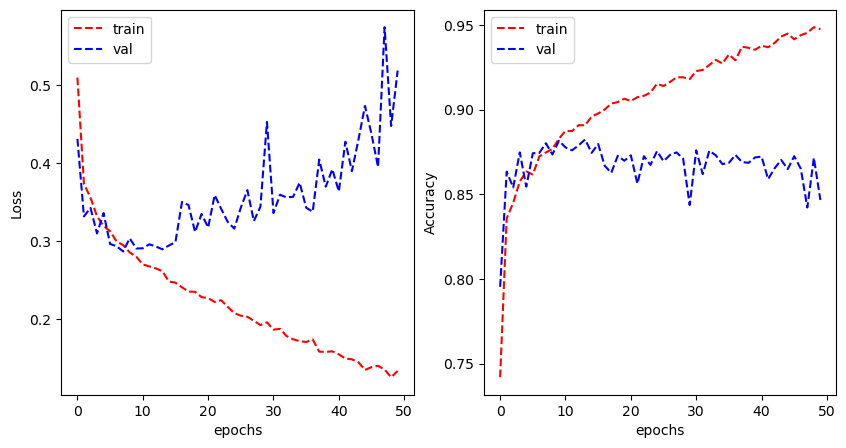

In [364]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_drop.history['loss'], 'r--')
plt.plot(history_leNet_drop.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_drop.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_drop.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


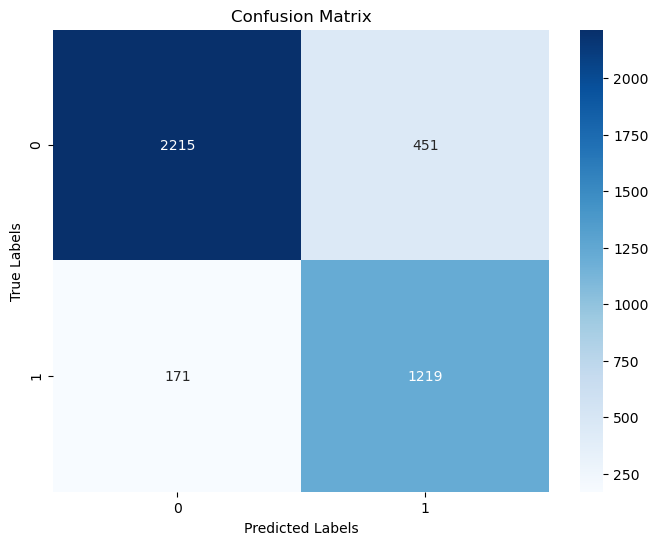

In [365]:
from sklearn.metrics import confusion_matrix


test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_drop.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [366]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_drop.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      2666
           1       0.73      0.88      0.80      1390

    accuracy                           0.85      4056
   macro avg       0.83      0.85      0.84      4056
weighted avg       0.86      0.85      0.85      4056



In [367]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_drop.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.729940119760479
Recall: 0.8769784172661871
F1 Score: 0.7967320261437909
AUC Score: 0.8539055627216158
Specificity: 0.8308327081770442


#### Observation

- Using dropout has led the model to overfit so choosing model 2.9 as the final model 

## Using VGG architecture on the baseline

In [105]:
import tensorflow as tf
OUTPUT_CLASSES=2

model_VGG_1 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax'),
])

In [106]:
model_VGG_1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [108]:
history_VGG_1 = model_VGG_1.fit(train_generator, validation_data = validation_generator, epochs=20, verbose=0)


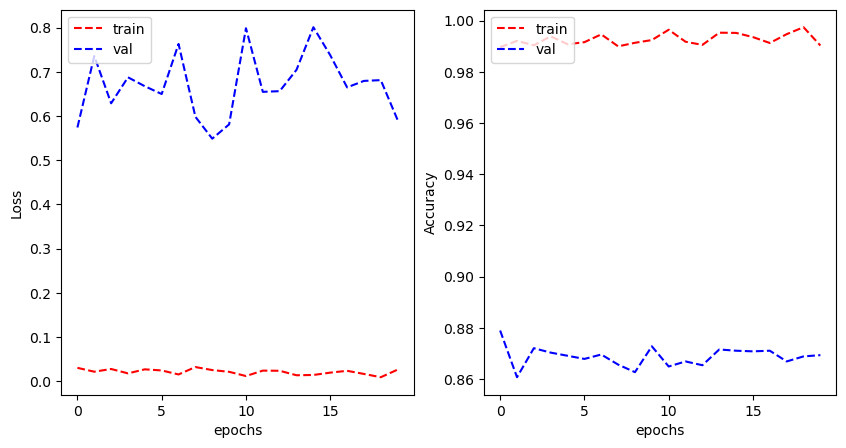

In [109]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_VGG_1.history['loss'], 'r--')
plt.plot(history_VGG_1.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_VGG_1.history['categorical_accuracy'], 'r--')
plt.plot(history_VGG_1.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

In [286]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_VGG_1.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.8507340946166395
Recall: 0.7503597122302158
F1 Score: 0.7974006116207951
AUC Score: 0.8408587758450403
Specificity: 0.931357839459865


## VGG with reduced complexity

In [110]:
import tensorflow as tf
OUTPUT_CLASSES=2

model_VGG_2 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax'),
])

In [111]:
model_VGG_2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [112]:
history_VGG_2 = model_VGG_2.fit(train_generator, validation_data = validation_generator, epochs=20, verbose=0)

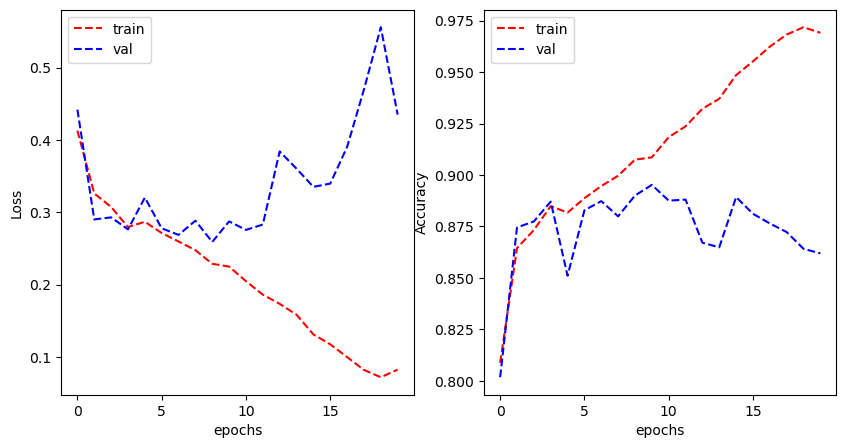

In [114]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_VGG_2.history['loss'], 'r--')
plt.plot(history_VGG_2.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_VGG_2.history['categorical_accuracy'], 'r--')
plt.plot(history_VGG_2.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

## Using Test data on the choosen model (2.9)

In [370]:
test_data['isCancerous'] = test_data['isCancerous'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./',
        x_col="image_path",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 4056 validated image filenames belonging to 2 classes.


/var/folders/sc/1ljq9fgn41xfwkqd6rv0dzgm0000gn/T/ipykernel_44188/798241368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['isCancerous'] = test_data['isCancerous'].astype('str')


In [373]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 32
OUTPUT_CLASSES = 2

In [375]:
sgd = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_ps.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_ps = model_leNet_ps.fit(train_generator, 
                                    validation_data = test_generator, 
                                    epochs=30, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


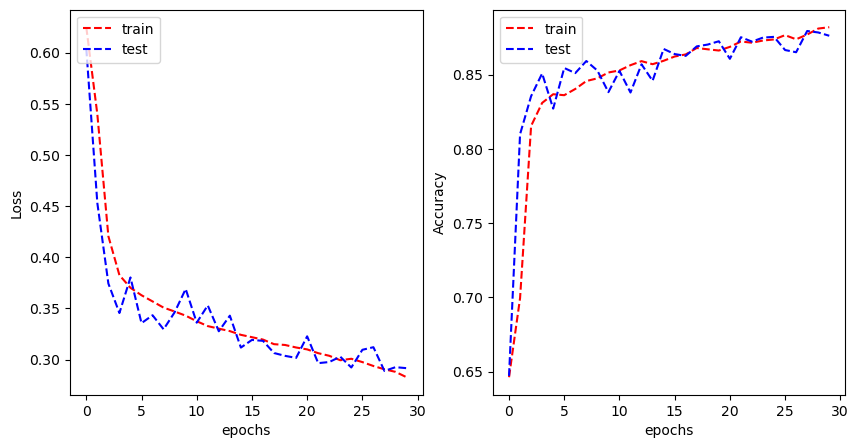

In [376]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_ps.history['loss'], 'r--')
plt.plot(history_leNet_ps.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_ps.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_ps.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


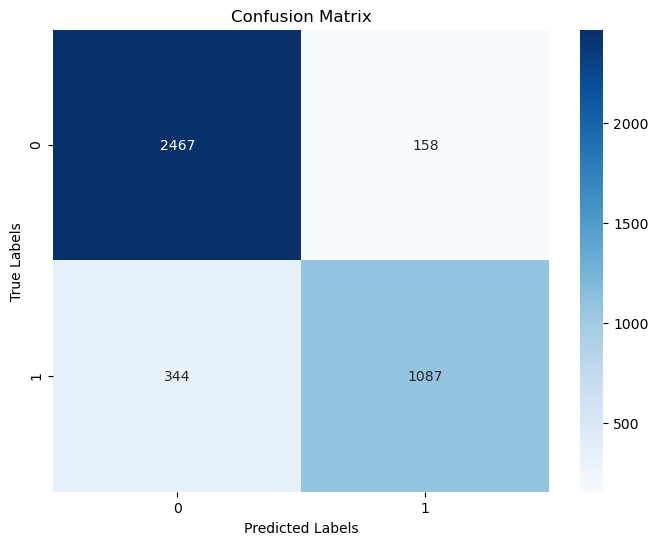

In [377]:
from sklearn.metrics import confusion_matrix


test_generator = datagen.flow_from_dataframe(
    dataframe=test_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_ps.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [378]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_ps.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2625
           1       0.87      0.76      0.81      1431

    accuracy                           0.88      4056
   macro avg       0.88      0.85      0.86      4056
weighted avg       0.88      0.88      0.87      4056



In [379]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_ps.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)
auc = roc_auc_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])


# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.8657937806873978
Recall: 0.7611510791366907
F1 Score: 0.8101071975497703
AUC Score: 0.8498178501459899
Specificity: 0.9384846211552889


In [380]:
model_leNet_ps.evaluate(test_generator)

127/127 [==============================] - 3s 23ms/step - loss: 0.2980 - categorical_accuracy: 0.8777


[0.29801616072654724, 0.8777120113372803]